# A simple Linear Regression problem

This is an artificial dataset about customer buying clothes after having a session about styling and advice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sns.set_style('white')
sns.set_palette("GnBu_d")

## Read the data

In [2]:
df = pd.read_csv("./data/01_EcommerceCustomers.csv")

### Experiment: What happens when I add a unique, random, uniformly sampled positive integer as a prediction column (equivalent to a UserID)?

In [3]:
def rand_foo():
    """Function that returns 500 uniformly sampled random
       positive integers in the range 0-10000"""
    foo = list()
    while True:
        if len(set(foo)) < 500:
            foo.append(abs(int(random.gauss(0, 10000))))
        else:
            break
    return set(foo)

In [4]:
df['foo'] = rand_foo()

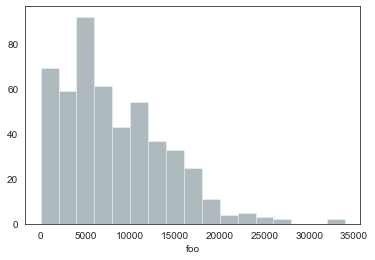

In [5]:
sns.distplot(df['foo'], kde=False)
plt.show()

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,foo
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,2
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,4100
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,10247
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,9
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,12298


* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

## Explore

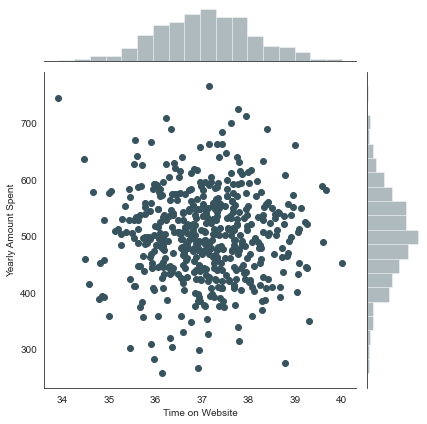

In [7]:
sns.jointplot(df['Time on Website'], df['Yearly Amount Spent'])

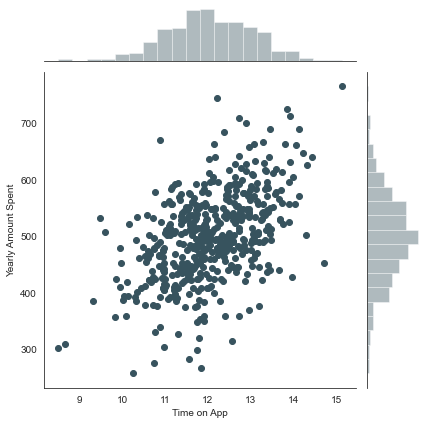

In [8]:
sns.jointplot(df['Time on App'], df['Yearly Amount Spent'])

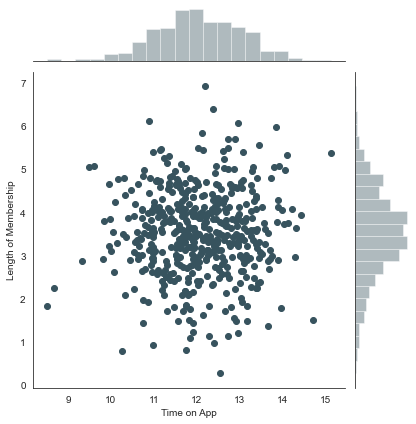

In [9]:
sns.jointplot(df['Time on App'], df['Length of Membership'])

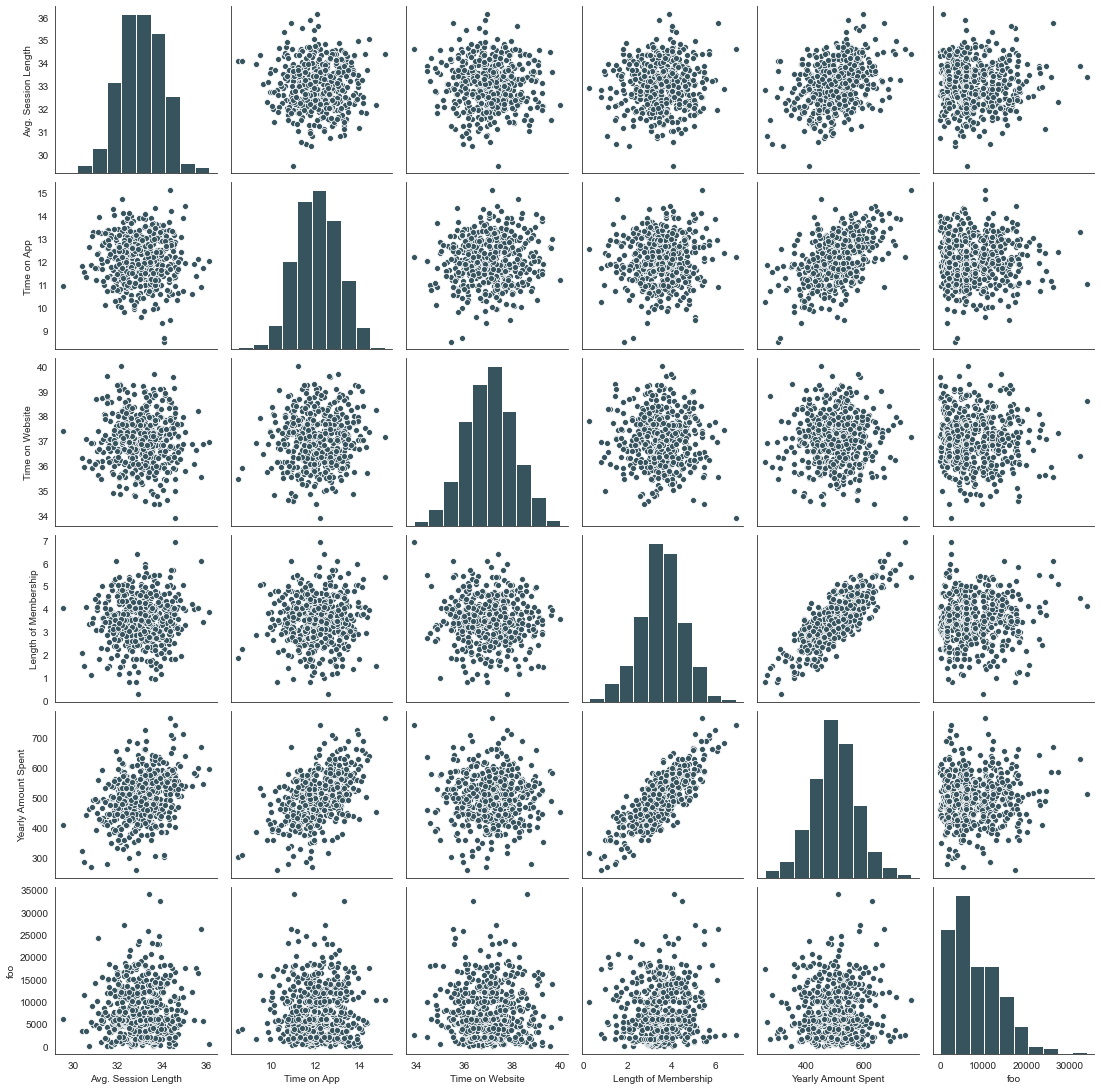

In [10]:
sns.pairplot(df)

Large correlation between Yearly ammount spent and length of membership

c:\users\alexrpd\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


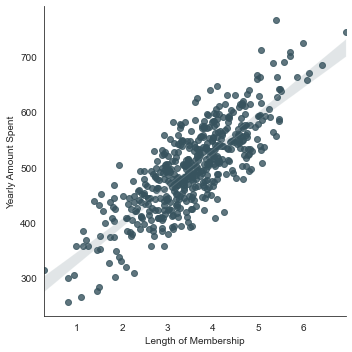

In [11]:
sns.lmplot('Length of Membership', 'Yearly Amount Spent', data=df)

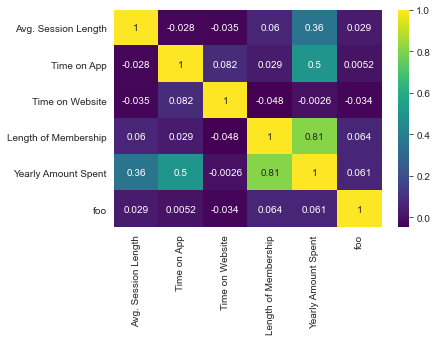

In [12]:
sns.heatmap(df.corr(), cmap='viridis', annot=True)

# Train the LinearRegression model


In [13]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,foo
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,2
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,4100
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,10247
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,9
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,12298


In [29]:
y = df['Yearly Amount Spent']

In [30]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train,y_train)

LinearRegression()

In [34]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

# Predicting


In [35]:
pred = lm.predict(X_test)

## Predictions using the `foo` column

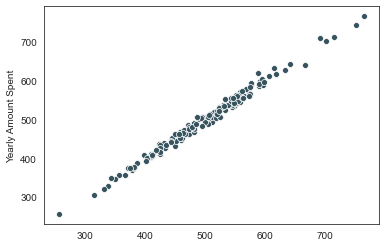

In [21]:
sns.scatterplot(pred, y_test)

## Predictions w/o the `foo` column

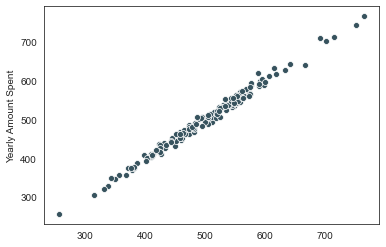

In [36]:
sns.scatterplot(pred, y_test)

# Evaluating the Model


In [22]:
print(f'MAE: {round(metrics.mean_absolute_error(y_true=y_test, y_pred=pred), 2)}')
print(f'MSE: {round(metrics.mean_squared_error(y_true=y_test, y_pred=pred),2)}')
print(f'RMSE: {round(np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=pred)), 2)}')

MAE: 7.24
MSE: 80.06
RMSE: 8.95


## Residuals


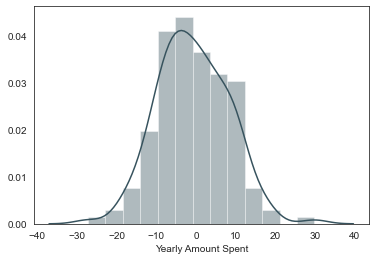

In [23]:

sns.distplot(y_test - pred)

## Conclusion

### Linear regression coefficients including the foo column

In [25]:
pd.DataFrame(lm.coef_, X_test.columns, columns=['Coeff'])

,Coeff
Avg. Session Length,25.979129
Time on App,38.593474
Time on Website,0.205730
Length of Membership,61.271601
foo,-0.000036


### Linear regression coefficients excluding the foo column

In [38]:
pd.DataFrame(lm.coef_, X_test.columns, columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
